## Bivariate analysis of qualitative variables and Chi-2 test or factorial correspondence analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import seaborn as sns

# load CSV file
df = pd.read_csv("mayors_cleaned.csv")

# take a look
df.head()

,person,personLabel,birthDate,genderLabel,partyLabel,start,end,positionLabel,cityLabel,start_year,end_year,birth_year,age_at_start
0,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1876-04-11 00:00:00+00:00,1877-04-10 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1876,1877,1842,34
1,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1882-04-11 00:00:00+00:00,1884-04-08 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1882,1884,1842,40
2,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1886-04-13 00:00:00+00:00,1889-01-07 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1886,1889,1842,44
3,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1901-01-07 00:00:00+00:00,1902-08-27 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1901,1902,1842,59
4,http://www.wikidata.org/entity/Q4668117,Abner C. Brownell,1813-01-01 00:00:00+00:00,male,Democratic Party,1852-01-01 00:00:00+00:00,1854-12-31 00:00:00+00:00,mayor of Cleveland,Cleveland,1852,1854,1813,39


In [2]:
# Example: Gender vs Political Party
# Group parties into 3 categories: Democratic, Republican, Other
df["party_grouped"] = df["partyLabel"].apply(
    lambda x: x if x in ["Democratic Party", "Republican Party"] else "Other Parties"
)

bins = [18, 30, 40, 50, 60, 70, 80]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
df["age_group"] = pd.cut(df["age_at_start"], bins=bins, labels=labels, right=False)


contingency_party_gender = pd.crosstab(df["genderLabel"], df["party_grouped"])
print(contingency_party_gender)

contingency_party_age = pd.crosstab(df["party_grouped"], df["age_group"])
print(contingency_party_age)

contingency_age_gender = pd.crosstab(df["genderLabel"], df["age_group"])
print(contingency_age_gender)

party_grouped  Democratic Party  Other Parties  Republican Party
genderLabel                                                     
female                       77              6                27
male                        504             67               276
age_group         18-29  30-39  40-49  50-59  60-69  70-79
party_grouped                                             
Democratic Party     23    137    186    160     59     16
Other Parties         4     18     31     14      5      1
Republican Party     12     67    108     76     36      4
age_group    18-29  30-39  40-49  50-59  60-69  70-79
genderLabel                                          
female           1     15     46     30     13      5
male            38    207    279    220     87     16


In [3]:
def chi2_test(df, col1, col2):
    """Run Chi² test for independence between two categorical columns."""
    contingency = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency)
    return {
        "Chi2 statistic": chi2,
        "Degrees of freedom": dof,
        "p-value": p
    }

print(chi2_test(df, "genderLabel", "party_grouped"))
print(chi2_test(df, "party_grouped", "age_group"))
print(chi2_test(df, "genderLabel", "age_group"))

{'Chi2 statistic': 4.524024674176565, 'Degrees of freedom': 2, 'p-value': 0.10414070754613237}
{'Chi2 statistic': 8.673649258504948, 'Degrees of freedom': 10, 'p-value': 0.5633299703020126}
{'Chi2 statistic': 13.63129519515234, 'Degrees of freedom': 5, 'p-value': 0.01812913566460881}


In [4]:
def association_strength(df, col1, col2):
    """Compute phi² (inertia) and Cramer's V for two categorical variables."""
    contingency = pd.crosstab(df[col1], df[col2])
    chi2, _, _, _ = chi2_contingency(contingency)
    n = contingency.sum().sum()
    phi2 = chi2 / n
    cramer_v = association(contingency, method="cramer")
    return {
        "phi² (inertia)": phi2,
        "Cramer's V": cramer_v
    }
print(association_strength(df, "genderLabel", "party_grouped"))
print(association_strength(df, "party_grouped", "age_group"))
print(association_strength(df, "genderLabel", "age_group"))

{'phi² (inertia)': 0.004727298510111353, "Cramer's V": 0.06875535259244442}
{'phi² (inertia)': 0.009063374355804543, "Cramer's V": 0.0673178072867965}
{'phi² (inertia)': 0.014243777633388025, "Cramer's V": 0.1193472983916604}


In [5]:
def local_deviations(df, col1, col2):
    """Show expected, deviations, and standardized residuals as tables."""
    contingency = pd.crosstab(df[col1], df[col2])
    chi2, _, _, expected = chi2_contingency(contingency)

    expected = pd.DataFrame(expected, 
                            index=contingency.index, 
                            columns=contingency.columns)

    deviations = contingency - expected
    std_residuals = deviations / expected.pow(0.5)

    print("Expected frequencies under independence")
    display(expected.round(2))
    print("--------------------------------------------------------")

    print("Deviations (Observed - Expected)")
    display(deviations.round(2))
    print("--------------------------------------------------------")

    print("Standardized residuals (z-scores)")
    display(std_residuals.round(2))
# Example usage:
local_deviations(df, "genderLabel", "party_grouped")

Expected frequencies under independence


party_grouped,Democratic Party,Other Parties,Republican Party
genderLabel,,,
female,66.78,8.39,34.83
male,514.22,64.61,268.17


--------------------------------------------------------
Deviations (Observed - Expected)


party_grouped,Democratic Party,Other Parties,Republican Party
genderLabel,,,
female,10.22,-2.39,-7.83
male,-10.22,2.39,7.83


--------------------------------------------------------
Standardized residuals (z-scores)


party_grouped,Democratic Party,Other Parties,Republican Party
genderLabel,,,
female,1.25,-0.83,-1.33
male,-0.45,0.30,0.48


## Interpretation: Gender x Political Party

- Female–Democratic: +1.25 residual → women are slightly more Democratic than independence predicts, but not strongly.
- Female–Republican: -1.33 residual → women are slightly less Republican than expected, again not strongly.
- Male–Republican: +0.48 residual → men are a bit more Republican than expected.
- Male–Democratic: -0.45 residual → men are a bit less Democratic than expected.

### All residuals are between -2 and +2 → no cell shows a strong significant deviation.
That means: gender and party grouping don’t have a strong local association in the  dataset.

In [6]:
local_deviations(df, "genderLabel", "age_group")

Expected frequencies under independence


age_group,18-29,30-39,40-49,50-59,60-69,70-79
genderLabel,,,,,,
female,4.48,25.52,37.36,28.74,11.49,2.41
male,34.52,196.48,287.64,221.26,88.51,18.59


--------------------------------------------------------
Deviations (Observed - Expected)


age_group,18-29,30-39,40-49,50-59,60-69,70-79
genderLabel,,,,,,
female,-3.48,-10.52,8.64,1.26,1.51,2.59
male,3.48,10.52,-8.64,-1.26,-1.51,-2.59


--------------------------------------------------------
Standardized residuals (z-scores)


age_group,18-29,30-39,40-49,50-59,60-69,70-79
genderLabel,,,,,,
female,-1.64,-2.08,1.41,0.24,0.44,1.66
male,0.59,0.75,-0.51,-0.08,-0.16,-0.60


## Interpretation: Gender x Age
### Key observations
- Female 30–39: residual −2.08 → significantly fewer women in this age group than expected.
- Female 18–29: residual −1.64 → somewhat fewer women than expected (borderline).
- Female 40–49: residual +1.41 → a bit more women than expected.
- Female 70–79: residual +1.66 → more women than expected, though still under the |2| threshold.

### Male cells mirror these (opposite deviations), but their residuals are smaller because expected counts are much larger for men.

The biggest deviation is the shortage of women aged 30–39 (z = −2.08), which is statistically notable.
Younger women (18–29) also underrepresented; older women (70–79) a bit overrepresented.
Overall, gender differences in age distribution exist, but the strongest local signal is:
- Fewer women than expected in their 30s, slightly more in older age.

In [7]:
local_deviations(df, "party_grouped", "age_group")

Expected frequencies under independence


age_group,18-29,30-39,40-49,50-59,60-69,70-79
party_grouped,,,,,,
Democratic Party,23.68,134.78,197.31,151.78,60.71,12.75
Other Parties,2.97,16.93,24.79,19.07,7.63,1.60
Republican Party,12.35,70.29,102.90,79.15,31.66,6.65


--------------------------------------------------------
Deviations (Observed - Expected)


age_group,18-29,30-39,40-49,50-59,60-69,70-79
party_grouped,,,,,,
Democratic Party,-0.68,2.22,-11.31,8.22,-1.71,3.25
Other Parties,1.03,1.07,6.21,-5.07,-2.63,-0.60
Republican Party,-0.35,-3.29,5.10,-3.15,4.34,-2.65


--------------------------------------------------------
Standardized residuals (z-scores)


age_group,18-29,30-39,40-49,50-59,60-69,70-79
party_grouped,,,,,,
Democratic Party,-0.14,0.19,-0.81,0.67,-0.22,0.91
Other Parties,0.59,0.26,1.25,-1.16,-0.95,-0.48
Republican Party,-0.10,-0.39,0.50,-0.35,0.77,-1.03


## Interpretation: Political Party x Age
### Key observations
- Democratic Party, 50–59: residual +0.67 → slightly more Democrats than expected in this group.
- Other Parties, 40–49: residual +1.25 → more minor-party supporters here.
- Other Parties, 50–59: residual −1.16 → fewer than expected.
- Republican Party, 60–69: residual +0.77 → modest overrepresentation.

### All residuals are well below |2|, so nothing rises to the level of strong significance.
The age–party link is very weak in this dataset: no cell crosses the ±2 threshold.
Slight tendencies:
- 40–49 year-olds lean more toward Other Parties than expected.
- 50–59 year-olds slightly more Democratic, fewer “Other Party.”
- 60–69 slightly more Republican.
- But all are minor shifts, not strong associations.

In [8]:
def plot_residuals_heatmap(df, row_col, col_col, figsize=(9,6), cmap="coolwarm", annot=True):
    """
    Heatmap of standardized residuals for a contingency table of df[row_col] x df[col_col].
    """
    # Contingency + expected
    obs = pd.crosstab(df[row_col], df[col_col])
    chi2, _, _, expected = chi2_contingency(obs)
    exp = pd.DataFrame(expected, index=obs.index, columns=obs.columns)

    # Standardized residuals (Pearson)
    resid = (obs - exp) / exp.pow(0.5)

    # Symmetric color scale around 0 (nice for over/under representation)
    vmax = abs(resid.values).max()
    vmin = -vmax

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.heatmap(
        resid.round(2),
        annot=resid.round(2) if annot else False,
        cmap=cmap,
        linewidths=.5,
        vmin=vmin, vmax=vmax,
        cbar_kws={"label": "Standardized residual (z-score)"},
        ax=ax
    )
    g.set_xlabel(col_col)
    g.set_ylabel(row_col)
    g.set_yticklabels(resid.index, rotation=30)

    plt.tight_layout()
    plt.show()

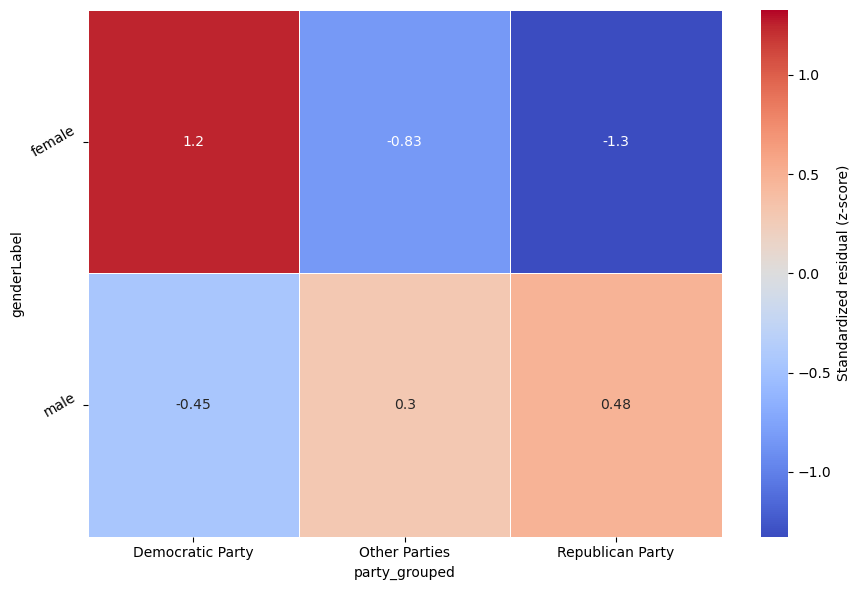

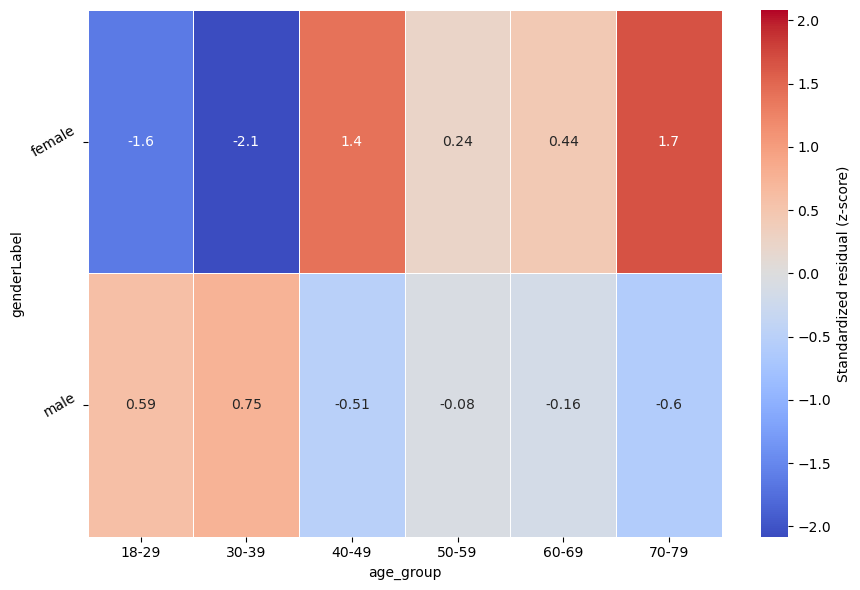

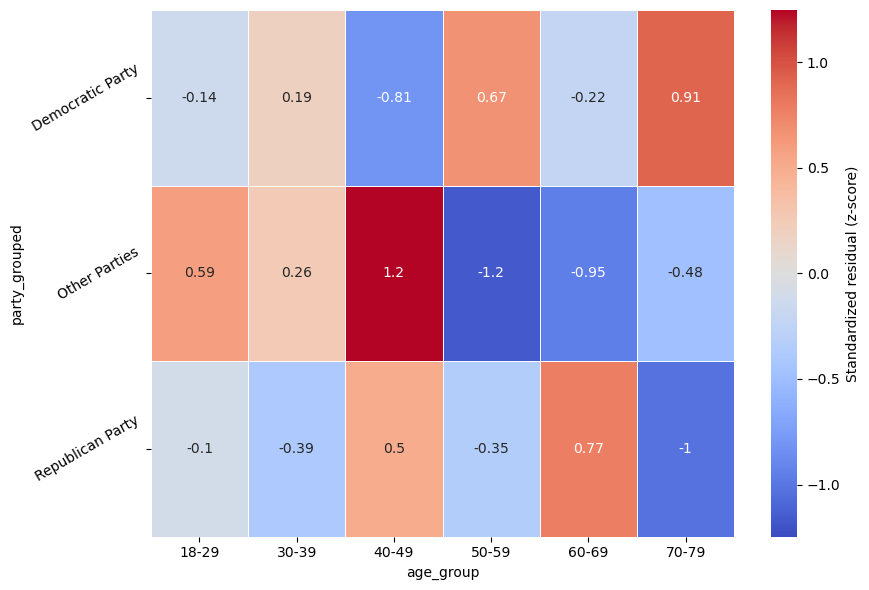

In [9]:
# Gender × Party residuals heatmap
plot_residuals_heatmap(df, "genderLabel", "party_grouped")

# Gender × Age group heatmap
plot_residuals_heatmap(df, "genderLabel", "age_group")

# Party × Age group heatmap
plot_residuals_heatmap(df, "party_grouped", "age_group")

In [10]:
# Define periods
PERIODS = [
    (1821, 1840, "1821–1840"),
    (1841, 1860, "1841–1860"),
    (1861, 1880, "1861–1880"),
    (1881, 1900, "1881–1900"),
    (1901, 1920, "1901–1920"),
    (1921, 1940, "1921–1940"),
    (1941, 1960, "1941–1960"),
    (1961, 1980, "1961–1980"),
    (1981, 2000, "1981–2000"),
    (2001, 2020, "2001–2020"),
    (2021, 2040, "2021–2040"),
]

# Assign periods
def get_period(year):
    for start, end, label in PERIODS:
        if start <= year <= end:
            return label
    return None

df["period"] = df["start_year"].apply(get_period)

In [12]:
print(chi2_test(df, "genderLabel", "period"))
print(association_strength(df, "genderLabel", "period"))

{'Chi2 statistic': 118.22399348373939, 'Degrees of freedom': 10, 'p-value': 1.15972808474685e-20}
{'phi² (inertia)': 0.12353604334769007, "Cramer's V": 0.3514769456844788}


Expected frequencies under independence


period,1821–1840,1841–1860,1861–1880,1881–1900,1901–1920,1921–1940,1941–1960,1961–1980,1981–2000,2001–2020,2021–2040
genderLabel,,,,,,,,,,,
female,0.92,5.98,8.39,10.23,9.66,6.67,7.01,12.64,20.8,27.47,0.23
male,7.08,46.02,64.61,78.77,74.34,51.33,53.99,97.36,160.2,211.53,1.77


--------------------------------------------------------
Deviations (Observed - Expected)


period,1821–1840,1841–1860,1861–1880,1881–1900,1901–1920,1921–1940,1941–1960,1961–1980,1981–2000,2001–2020,2021–2040
genderLabel,,,,,,,,,,,
female,-0.92,-5.98,-8.39,-10.23,-8.66,-6.67,-6.01,-3.64,14.2,36.53,-0.23
male,0.92,5.98,8.39,10.23,8.66,6.67,6.01,3.64,-14.2,-36.53,0.23


--------------------------------------------------------
Standardized residuals (z-scores)


period,1821–1840,1841–1860,1861–1880,1881–1900,1901–1920,1921–1940,1941–1960,1961–1980,1981–2000,2001–2020,2021–2040
genderLabel,,,,,,,,,,,
female,-0.96,-2.44,-2.90,-3.20,-2.79,-2.58,-2.27,-1.02,3.11,6.97,-0.48
male,0.35,0.88,1.04,1.15,1.00,0.93,0.82,0.37,-1.12,-2.51,0.17


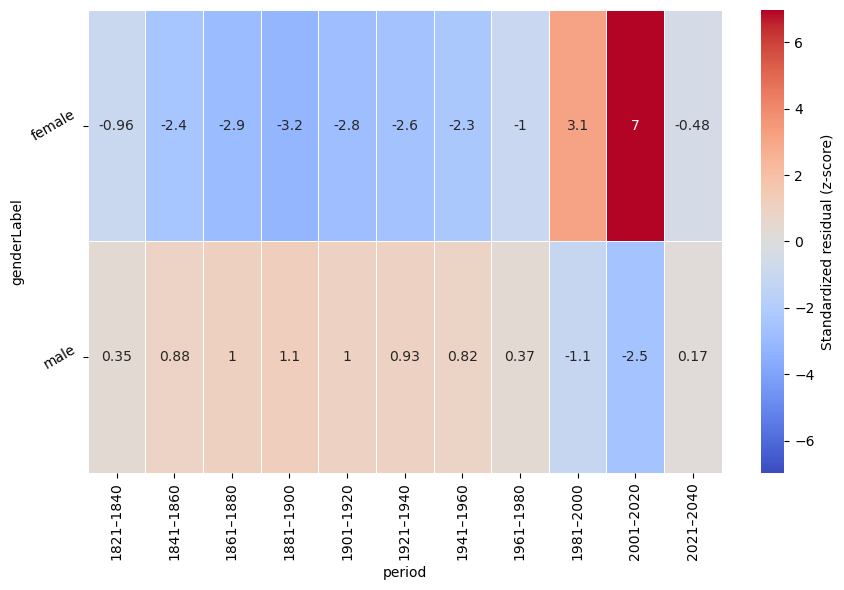

In [13]:
local_deviations(df, "genderLabel", "period")
plot_residuals_heatmap(df, "genderLabel", "period")